importing liberaries need EDA

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

loading data

In [52]:
opened = pd.read_csv('email_opened_table.csv')
email_table = pd.read_csv('email_table.csv')
clicked = pd.read_csv('link_clicked_table.csv')


viewing data

In [53]:
email_table

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6
...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5
99996,899722,long_email,personalized,7,Saturday,US,1
99997,449610,long_email,personalized,11,Saturday,UK,6
99998,72497,short_email,generic,10,Monday,UK,0


In [54]:
opened

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
...,...
10340,990213
10341,918210
10342,200299
10343,211104


making new column with value 1 for opened 

In [55]:
opened['opened'] = 1

In [56]:
clicked

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
...,...
2114,873162
2115,435454
2116,206772
2117,742967


making new column for clicked with value 1

In [57]:
clicked['clicked'] = 1

merging diffrent data on email id

In [58]:
emails = pd.merge(email_table, clicked[['email_id', 'clicked']], on='email_id', how='left')

In [59]:
emails = pd.merge(emails, opened[['email_id', 'opened']], on='email_id', how='left')

In [60]:
emails

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,opened
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,NaN,NaN
99996,899722,long_email,personalized,7,Saturday,US,1,NaN,NaN
99997,449610,long_email,personalized,11,Saturday,UK,6,NaN,NaN
99998,72497,short_email,generic,10,Monday,UK,0,NaN,NaN


describing the data

In [61]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_id             100000 non-null  int64  
 1   email_text           100000 non-null  object 
 2   email_version        100000 non-null  object 
 3   hour                 100000 non-null  int64  
 4   weekday              100000 non-null  object 
 5   user_country         100000 non-null  object 
 6   user_past_purchases  100000 non-null  int64  
 7   clicked              2119 non-null    float64
 8   opened               10345 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


filling null value in the clicked and opened column

In [62]:
emails['clicked'] = emails['clicked'].fillna(0)
emails['opened'] = emails['opened'].fillna(0)

In [63]:
emails.sample(10)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,opened
31292,11061,short_email,personalized,15,Monday,US,6,0.0,0.0
49660,542851,long_email,personalized,6,Thursday,US,10,0.0,0.0
87659,663579,long_email,personalized,16,Sunday,UK,4,0.0,0.0
83922,835276,short_email,generic,5,Tuesday,US,8,0.0,0.0
40751,561042,short_email,generic,14,Sunday,US,1,0.0,0.0
53076,770320,short_email,personalized,10,Sunday,UK,1,0.0,0.0
95595,854616,long_email,generic,4,Sunday,US,1,0.0,0.0
67495,365474,long_email,generic,1,Sunday,US,0,0.0,0.0
89129,245806,short_email,generic,4,Sunday,US,1,0.0,0.0
79022,178972,long_email,generic,4,Thursday,UK,5,0.0,1.0


changing the data type of clicked and opened column from float to int64

In [64]:
emails['clicked'] = emails['clicked'].astype('int64')
emails['opened'] = emails['opened'].astype('int64')

check for null values


In [ ]:
emails.isna().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
clicked                0
opened                 0
dtype: int64

visualizing the click and opened emails


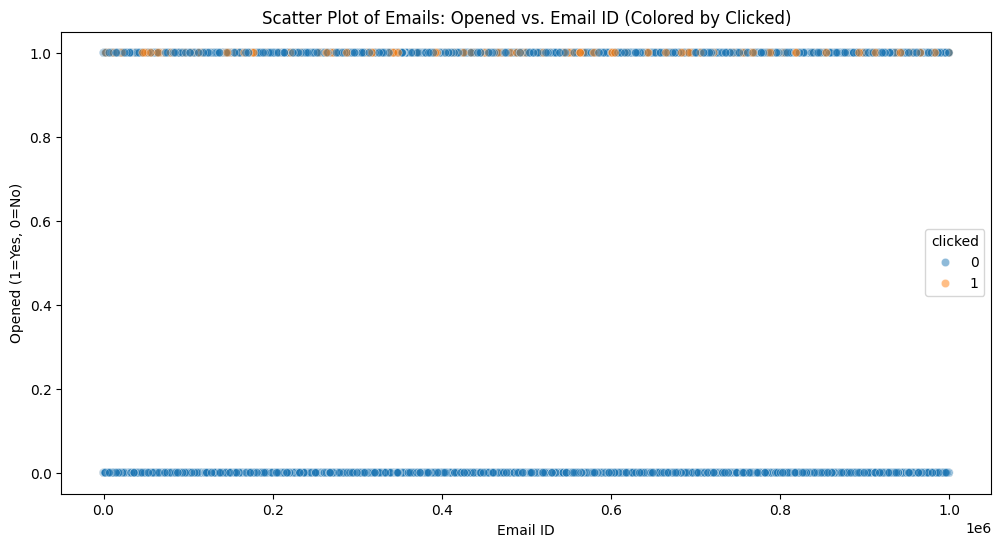

In [66]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=emails, x='email_id', y='opened', hue='clicked', alpha=0.5)
plt.title('Scatter Plot of Emails: Opened vs. Email ID (Colored by Clicked)')
plt.xlabel('Email ID')
plt.ylabel('Opened (1=Yes, 0=No)')
plt.show()

Visualizing the distribution and relationships between numerical features using a pair plot.

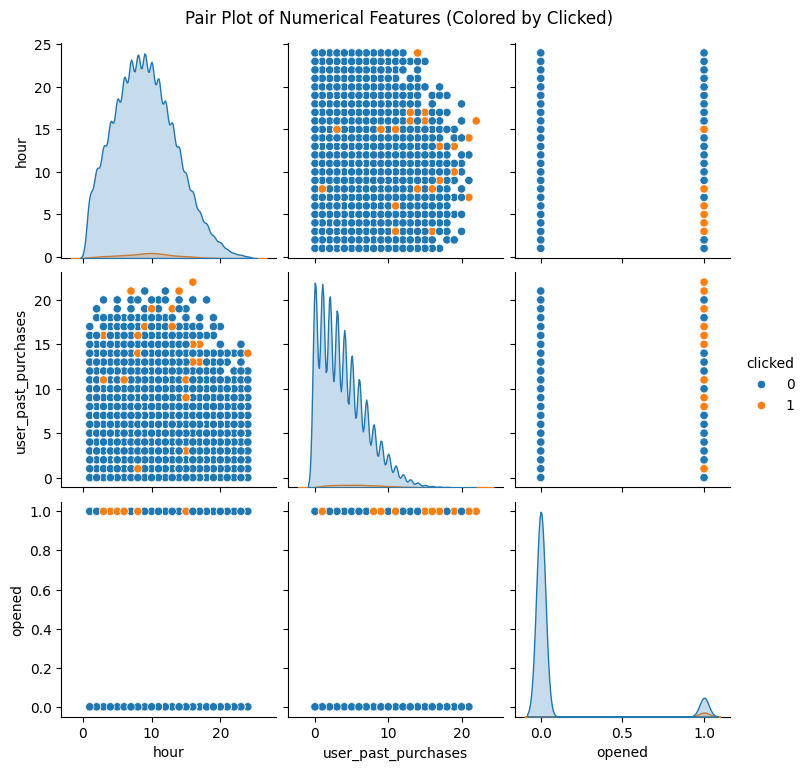

In [67]:
# Select numerical columns for pair plot (excluding email_id as it's just an identifier)
numerical_cols = ['hour', 'user_past_purchases', 'opened', 'clicked']
sns.pairplot(emails[numerical_cols], hue='clicked', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features (Colored by Clicked)', y=1.02)
plt.show()

decribing the data

In [81]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             99950 non-null  int64 
 1   email_text           99950 non-null  object
 2   email_version        99950 non-null  object
 3   hour                 99950 non-null  int64 
 4   weekday              99950 non-null  object
 5   user_country         99950 non-null  object
 6   user_past_purchases  99950 non-null  int64 
 7   clicked              99950 non-null  int64 
 8   opened               99950 non-null  int64 
 9   engagement_status    99950 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.4+ MB


checking for duplicate value

In [68]:
emails.duplicated().sum()

np.int64(0)

checking for the number of email that are opend, clicked and opened but didtn clicked

In [ ]:
clicked_and_opened = emails[(emails['clicked'] == 1) & (emails['opened'] == 1)].shape[0]
not_clicked_not_opened = emails[(emails['clicked'] == 0) & (emails['opened'] == 0)].shape[0]
opened_not_clicked = emails[(emails['opened'] == 1) & (emails['clicked'] == 0)].shape[0]
# It's logically impossible to click without opening in this dataset's context
clicked_not_opened_check = emails[(emails['opened'] == 0) & (emails['clicked'] == 1)].shape[0]

print(f"Emails clicked and opened: {clicked_and_opened}")
print(f"Emails not clicked and not opened: {not_clicked_not_opened}")
print(f"Emails opened but not clicked: {opened_not_clicked}")
print(f"Emails clicked but not opened (anomaly check): {clicked_not_opened_check}")

Emails clicked and opened: 2069
Emails not clicked and not opened: 89605
Emails opened but not clicked: 8276
Emails clicked but not opened (anomaly check): 50


creating a new column based on engagement status (opened/clicked)

In [71]:
def get_engagement_status(row):
    if row['clicked'] == 1 and row['opened'] == 1:
        return "Clicked and Opened"
    elif row['opened'] == 1 and row['clicked'] == 0:
        return "Opened but Not Clicked"
    elif row['opened'] == 0 and row['clicked'] == 0:
        return "Not Opened"
    else:
        # Handle potential anomalies or unexpected cases, though clicked=1/opened=0 shouldn't occur
        return "Anomaly"

emails['engagement_status'] = emails.apply(get_engagement_status, axis=1)

# Display the DataFrame with the new column and the counts of each status
print(emails['engagement_status'].value_counts())
emails.head()

engagement_status
Not Opened                89605
Opened but Not Clicked     8276
Clicked and Opened         2069
Anomaly                      50
Name: count, dtype: int64


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,opened,engagement_status
0,85120,short_email,personalized,2,Sunday,US,5,0,0,Not Opened
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,Clicked and Opened
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,Not Opened
3,493711,short_email,generic,6,Monday,UK,1,0,0,Not Opened
4,106887,long_email,generic,14,Monday,US,6,0,0,Not Opened


removing the 4th category clicked but not open that is not possible

In [77]:
anomaly_indices = emails[emails['engagement_status'] == 'Anomaly'].index
emails.drop(anomaly_indices, inplace=True)

In [78]:
(emails['engagement_status']=='anamoly').sum()

np.int64(0)

Performing feature engineering to drop the column with minimum weightage

In [82]:
emails[['user_past_purchases', 'clicked']].corr()


,user_past_purchases,clicked
user_past_purchases,1.00000,0.10694
clicked,0.10694,1.00000


C:\Users\gaura\AppData\Local\Temp\ipykernel_20016\3324860722.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=emails, x='user_past_purchases', y='clicked', ci=None, palette='viridis')
C:\Users\gaura\AppData\Local\Temp\ipykernel_20016\3324860722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emails, x='user_past_purchases', y='clicked', ci=None, palette='viridis')


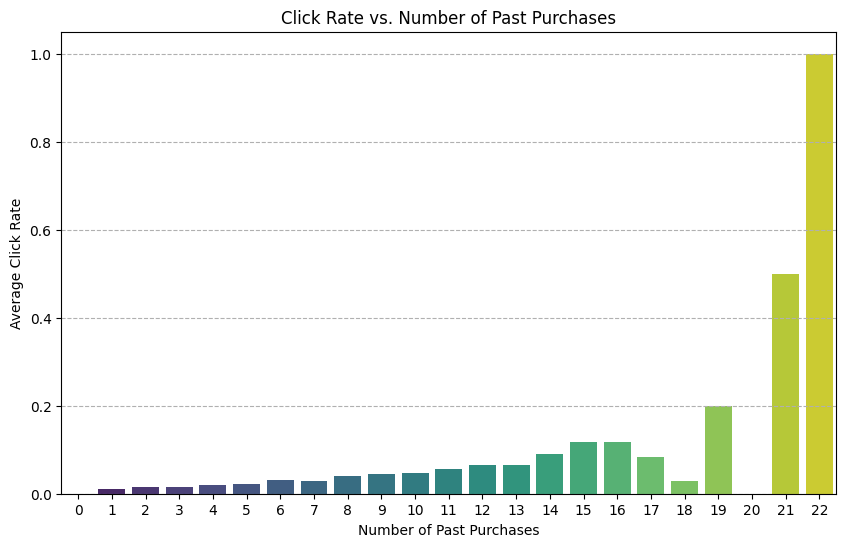

In [92]:
# Visualize the relationship between past purchases and click rate
plt.figure(figsize=(10, 6))
sns.barplot(data=emails, x='user_past_purchases', y='clicked', ci=None, palette='viridis')
plt.title('Click Rate vs. Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Calculate contingency table for user_country vs clicked
contingency_table_user_country = pd.crosstab(emails['user_country'], emails['clicked'])
chi2_country, p_country, dof_country, expected_country = chi2_contingency(contingency_table_user_country)

print(f"User Country vs Clicked: Chi2 = {chi2_country}, p-value = {p_country}")


Chi2 = 207.4092378823248, p-value = 1.0570348835047669e-44


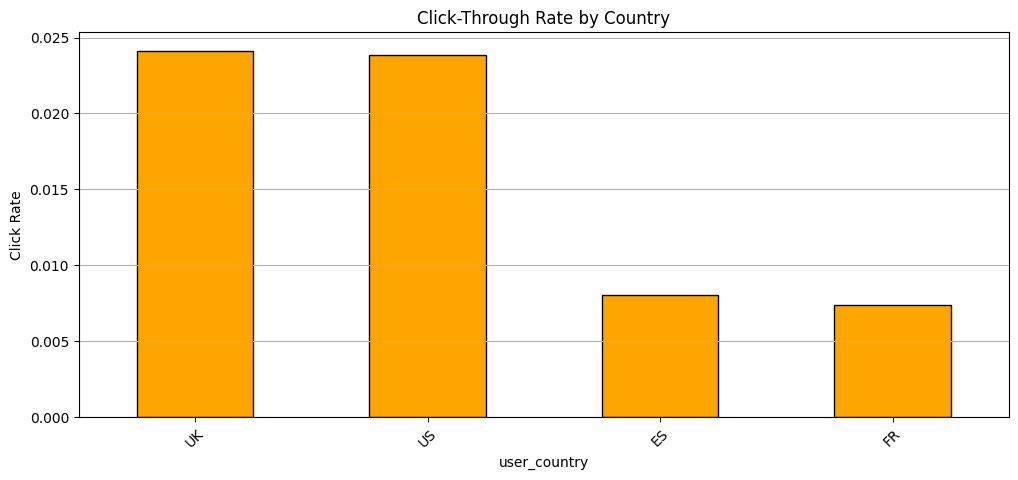

In [89]:
emails.groupby('user_country')['clicked'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,5), color='orange', edgecolor='black')
plt.title("Click-Through Rate by Country")
plt.ylabel("Click Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Calculate contingency table for email_text vs clicked
contingency_table_email_text = pd.crosstab(emails['email_text'], emails['clicked'])
chi2_text, p_text, dof_text, expected_text = chi2_contingency(contingency_table_email_text)

print(f"Email Text vs Clicked: Chi2 = {chi2_text}, p-value = {p_text}")

Chi2 = 36.328219534707365, p-value = 1.6673212338017654e-09


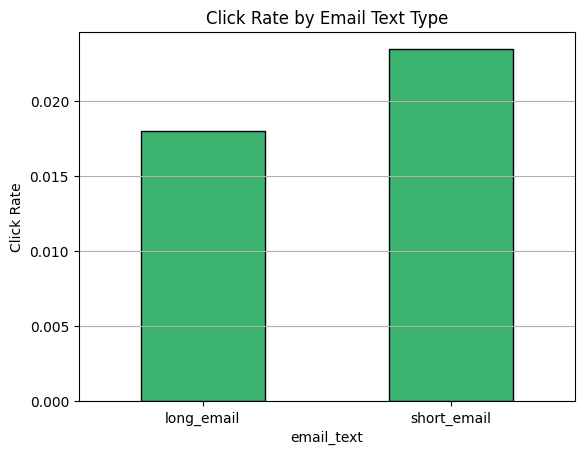

In [90]:
emails.groupby('email_text')['clicked'].mean().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Click Rate by Email Text Type")
plt.ylabel("Click Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
# Calculate contingency table for email_version vs clicked
contingency_table_email_version = pd.crosstab(emails['email_version'], emails['clicked'])
chi2_version, p_version, dof_version, expected_version = chi2_contingency(contingency_table_email_version)

print(f"Email Version vs Clicked: Chi2 = {chi2_version}, p-value = {p_version}")

Chi2 = 36.328219534707365, p-value = 1.6673212338017654e-09


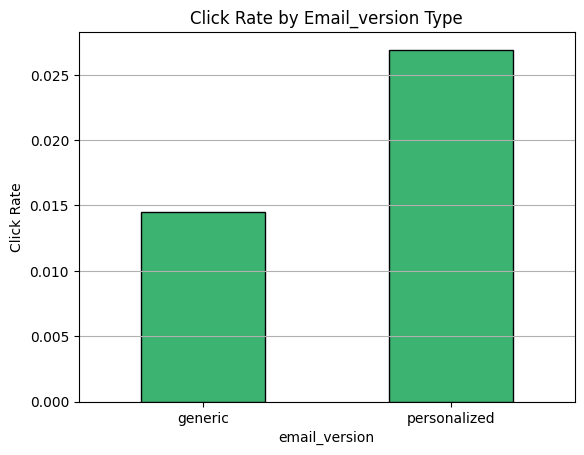

In [91]:
emails.groupby('email_version')['clicked'].mean().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Click Rate by Email_version Type")
plt.ylabel("Click Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [88]:
emails

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked,opened,engagement_status
0,85120,short_email,personalized,2,Sunday,US,5,0,0,Not Opened
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,Clicked and Opened
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,Not Opened
3,493711,short_email,generic,6,Monday,UK,1,0,0,Not Opened
4,106887,long_email,generic,14,Monday,US,6,0,0,Not Opened
...,...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0,0,Not Opened
99996,899722,long_email,personalized,7,Saturday,US,1,0,0,Not Opened
99997,449610,long_email,personalized,11,Saturday,UK,6,0,0,Not Opened
99998,72497,short_email,generic,10,Monday,UK,0,0,0,Not Opened
